In [1]:
import torch
from torchvision.models import resnet50, ResNet50_Weights
import torchvision.transforms.functional as transform

import PIL

import os
import random
import json
import numpy as np
import pandas as pd
import io

from tqdm import tqdm

from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [2]:
# https://pytorch.org/vision/stable/models.html

In [29]:
# New weights with accuracy 80.858%

model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

In [4]:
# /home/alex/.cache/torch/hub/checkpoints

In [3]:
for param in model.parameters():
    print(param.shape)

torch.Size([64, 3, 7, 7])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([64, 256, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([64, 256, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([128, 256, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([512, 128, 1, 1])
torch.Size([512])
torch.Size([512])
torch.Size([512, 256, 1, 1])
torch.Size([512])
torch.Size([512])
torch.Size([128, 512, 1, 1])
torch.Size([128])
torch.Siz

In [3]:
sum(p.numel() for p in model.parameters())

25557032

In [5]:
sum(p.numel() for p in model.parameters()) / (1000000)

25.557032

In [4]:
device = torch.device('cpu')

In [5]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [30]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [7]:
model.avgpool

AdaptiveAvgPool2d(output_size=(1, 1))

In [10]:
model.layer4[2]

Bottleneck(
  (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)

In [8]:
class Identity(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return x

In [31]:
model.fc = Identity()

In [32]:
weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()

In [11]:
weights.transforms

functools.partial(<class 'torchvision.transforms._presets.ImageClassification'>, crop_size=224, resize_size=232)

In [33]:
with open('./ex1.jpg', 'rb') as f:
    file_data = f.read() 

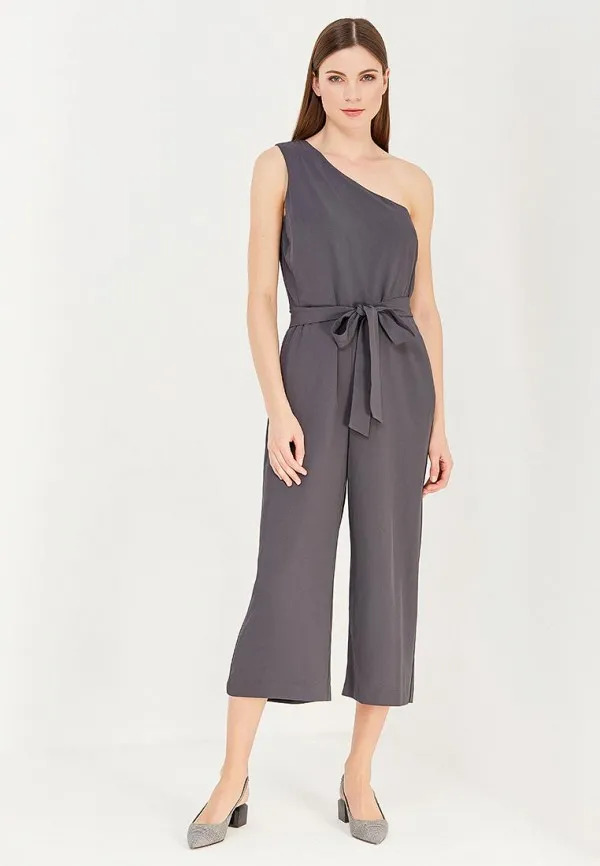

In [34]:
PIL.Image.open(io.BytesIO(file_data))

In [35]:
pil_img =  PIL.Image.open('./ex1.jpg')

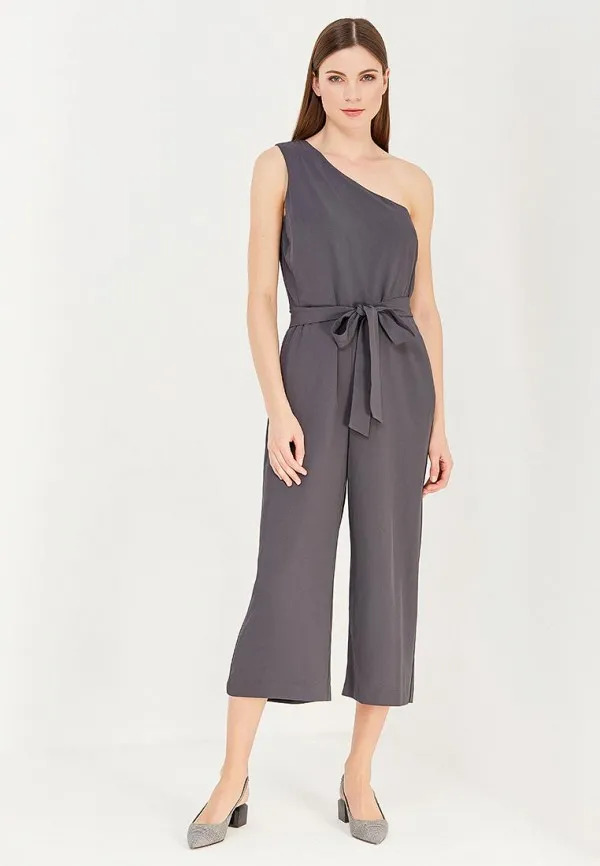

In [36]:
pil_img

In [37]:
img = transform.to_tensor(pil_img)

In [38]:
img.shape

torch.Size([3, 866, 600])

In [39]:
img_transformed = preprocess(img)

In [40]:
img_transformed

tensor([[[2.0605, 2.0605, 2.0810,  ..., 1.8208, 1.8208, 1.8208],
         [2.0605, 2.0605, 2.0605,  ..., 1.8208, 1.8208, 1.8208],
         [2.0605, 2.0605, 2.0605,  ..., 1.8208, 1.8208, 1.8208],
         ...,
         [2.0239, 2.0092, 1.9920,  ..., 1.9064, 1.9235, 1.9235],
         [2.0239, 2.0092, 1.9921,  ..., 1.9065, 1.9236, 1.9236],
         [2.0239, 2.0092, 2.0092,  ..., 1.9235, 1.9283, 1.9407]],

        [[2.2185, 2.2185, 2.2080,  ..., 1.9734, 1.9734, 1.9734],
         [2.2185, 2.2185, 2.2185,  ..., 1.9734, 1.9734, 1.9734],
         [2.2185, 2.2185, 2.2185,  ..., 1.9734, 1.9734, 1.9734],
         ...,
         [2.1811, 2.1660, 2.1485,  ..., 2.0609, 2.0784, 2.0784],
         [2.1811, 2.1660, 2.1486,  ..., 2.0610, 2.0785, 2.0785],
         [2.1811, 2.1660, 2.1660,  ..., 2.0784, 2.0833, 2.0959]],

        [[2.3960, 2.3960, 2.3960,  ..., 2.1171, 2.1171, 2.1171],
         [2.3960, 2.3960, 2.3960,  ..., 2.1171, 2.1171, 2.1171],
         [2.3960, 2.3960, 2.3960,  ..., 2.1171, 2.1171, 2.

In [41]:
img_transformed.shape

torch.Size([3, 224, 224])

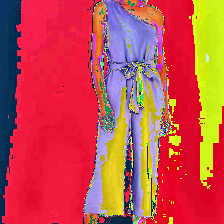

In [42]:
transform.to_pil_image(img_transformed)

In [41]:
# Переводим модель в режм вычисления (инференс)

In [43]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [44]:
batch = preprocess(img).unsqueeze(0)

In [45]:
batch.shape

torch.Size([1, 3, 224, 224])

In [46]:
%%time

with torch.no_grad():
    prediction = model(batch)

CPU times: user 773 ms, sys: 3.68 ms, total: 777 ms
Wall time: 205 ms


In [36]:
prediction = model(batch)

In [47]:
prediction.shape

torch.Size([1, 2048])

In [48]:
prediction

tensor([[0., 0., 0.,  ..., 0., 0., 0.]])

In [40]:
prediction.squeeze(0)

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [49]:
a = prediction.squeeze(0).numpy()

In [50]:
a[a > 0]

array([7.11662024e-02, 1.29227030e+00, 2.92940773e-02, 1.02746245e-02,
       1.62779227e-01, 7.72503197e-01, 4.60697003e-02, 2.13202730e-01,
       1.60716884e-02, 3.10168564e-02, 4.52011637e-02, 8.75090957e-02,
       1.57132875e-02, 8.32861587e-02, 1.88167598e-02, 5.35018109e-02,
       2.43405905e-03, 1.10127732e-01, 1.13021314e-01, 1.03592286e-02,
       1.02287410e-02, 1.19766863e-02, 2.55817305e-02, 7.47390836e-03,
       7.34878555e-02, 3.02731860e-02, 4.70620347e-03, 4.79462696e-03,
       2.88447086e-02, 6.58718348e-02, 1.43673286e-01, 1.52093638e-02,
       1.76185799e+00, 4.31124091e-01, 1.04476519e-01, 7.14876223e-03,
       6.17589474e-01, 9.93401185e-02, 8.17831755e-02, 1.38195511e-02,
       1.57240089e-02, 2.37518493e-02, 1.58395469e-01, 1.04034496e-02,
       1.82570863e+00, 4.28716950e-02, 2.84936577e-01, 7.05692731e-03,
       2.24602539e-02, 8.18798468e-02, 3.59815806e-02, 3.16422321e-02,
       1.67676341e-02, 2.10224949e-02, 1.22836791e-01, 9.52562504e-03,
      

In [42]:
files = os.listdir('./main_pics')

In [44]:
len(files)

1679

In [45]:
%%time
imgs = []

for f in files:
    pil_img =  PIL.Image.open(f'./main_pics/{f}')
    # pil_img = PIL.ImageOps.grayscale(pil_img)
    img = transform.to_tensor(pil_img)
    # img = torch.Tensor.repeat(img, 3, 1, 1)
    img_transformed = preprocess(img)
    imgs.append(img_transformed)

CPU times: user 43.9 s, sys: 1.32 s, total: 45.3 s
Wall time: 19.2 s


In [46]:
len(imgs)

1679

In [48]:
imgs[0].shape

torch.Size([3, 224, 224])

In [49]:
pool = ThreadPoolExecutor(20)

def vectorize_image(fp):
    pil_img =  PIL.Image.open(f'./main_pics/{f}')
    # pil_img = PIL.ImageOps.grayscale(pil_img)
    img = transform.to_tensor(pil_img)
    # img = torch.Tensor.repeat(img, 3, 1, 1)
    img_transformed = preprocess(img)
    imgs_thread.append(img_transformed)
    
    return f'{fp} ok' 
    

In [50]:
%%time
imgs_thread = []


for f in files:
    fut = pool.submit(vectorize_image, fp=f)
    
fut.result()

CPU times: user 42.8 s, sys: 6.85 s, total: 49.6 s
Wall time: 14.5 s


'MP002XW05L2Y_0.jpg ok'

In [40]:
len(imgs_thread)

1679

In [42]:
files[-1]

'MP002XW05L2Y_0.jpg'

In [51]:
index = []
for f in files:
    index.append(f.split('_')[0])

In [52]:
with open('index.json', 'w') as f:
    json.dump(index, f)

In [45]:
random.sample(index, 10)

['MP002XW0L3GZ',
 'MP002XW16BYH',
 'MP002XW0QB7D',
 'MP002XW0CWDK',
 'MP002XW0X5EC',
 'RTLACE021401',
 'RTLACF470801',
 'MP002XW0MLBU',
 'RTLAAH028101',
 'MP002XW0WSYH']

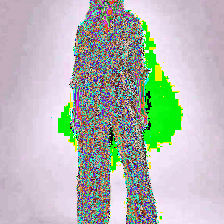

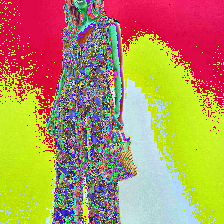

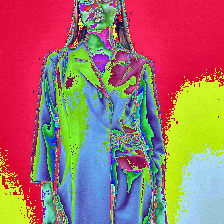

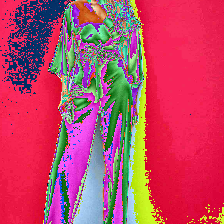

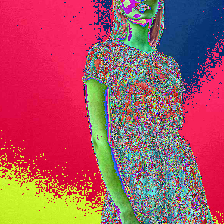

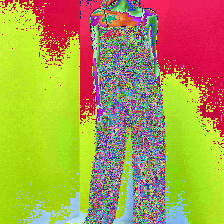

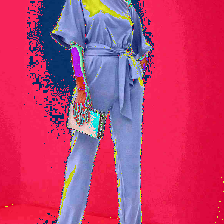

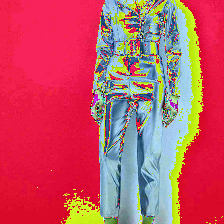

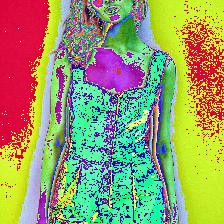

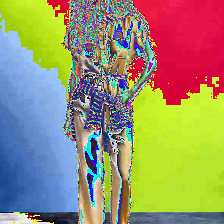

In [53]:
for i in random.sample(imgs, 10):
    display(transform.to_pil_image(i))

In [54]:
imgs[0].shape

torch.Size([3, 224, 224])

In [55]:
imgs[0].unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [56]:
batch = torch.vstack(tuple((im.unsqueeze(0) for im in imgs)))


In [57]:
batch.shape

torch.Size([1679, 3, 224, 224])

In [ ]:
%%time

with torch.no_grad():
    vects = model(batch)

In [67]:
vects.shape

torch.Size([1679, 2048])

In [72]:
vects[0]

tensor([0.0416, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000])

In [73]:
vects[0].shape

torch.Size([2048])

In [68]:
vects.norm(dim=1).shape

torch.Size([1679])

In [75]:
vects.norm(dim=1)

tensor([13.0177, 14.1011, 11.0112,  ..., 12.0953,  9.1581, 14.8222])

In [74]:
vects.norm(dim=1).unsqueeze(1)

tensor([[13.0177],
        [14.1011],
        [11.0112],
        ...,
        [12.0953],
        [ 9.1581],
        [14.8222]])

In [76]:
vects.norm(dim=1).unsqueeze(1).shape

torch.Size([1679, 1])

In [77]:
torch.Tensor.repeat(vects.norm(dim=1).unsqueeze(1), 1, 2048)

tensor([[13.0177, 13.0177, 13.0177,  ..., 13.0177, 13.0177, 13.0177],
        [14.1011, 14.1011, 14.1011,  ..., 14.1011, 14.1011, 14.1011],
        [11.0112, 11.0112, 11.0112,  ..., 11.0112, 11.0112, 11.0112],
        ...,
        [12.0953, 12.0953, 12.0953,  ..., 12.0953, 12.0953, 12.0953],
        [ 9.1581,  9.1581,  9.1581,  ...,  9.1581,  9.1581,  9.1581],
        [14.8222, 14.8222, 14.8222,  ..., 14.8222, 14.8222, 14.8222]])

In [78]:
torch.Tensor.repeat(vects.norm(dim=1).unsqueeze(1), 1, 2048).shape

torch.Size([1679, 2048])

In [79]:
vects_norm = vects / torch.Tensor.repeat(vects.norm(dim=1).unsqueeze(1), 1, 2048)

In [80]:
vects_norm_np = vects_norm.numpy()

In [81]:
np.min(vects_norm_np)

0.0

In [82]:
np.max(vects_norm_np)

0.585503

In [86]:
with open('./vects.npy', 'wb') as f:
    np.save(f, vects_norm_np)

In [399]:
vects_norm_np

array([[0.00319791, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00220482],
       [0.00172307, 0.        , 0.00540433, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00296392, 0.00881204, 0.        , ..., 0.        , 0.        ,
        0.00212749],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00748461, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00043273]], dtype=float32)

In [84]:
vects_norm_np = vects_norm_np.astype(np.float16)

In [85]:
vects_norm_np

array([[0.003199 , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.002205 ],
       [0.001723 , 0.       , 0.005405 , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.002964 , 0.00881  , 0.       , ..., 0.       , 0.       ,
        0.002127 ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.007484 , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0004327]], dtype=float16)

In [87]:
vects_norm_np_q = vects_norm_np * 128

In [88]:
np.max(vects_norm_np_q)

74.94

In [89]:
vects_norm_np_q = vects_norm_np_q.astype(np.int8)

In [90]:
np.max(vects_norm_np_q)


74

In [91]:
with open('./vects_q.npy', 'wb') as f:
    np.save(f, vects_norm_np_q)

In [92]:
vects_norm.shape

torch.Size([1679, 2048])

In [93]:
vects_norm[10].norm()

tensor(1.0000)

In [94]:
v = vects[1]

In [95]:
v

tensor([0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0311])

In [96]:
def get_similar(v, vects_norm, n=10):
    v_norm = v / v.norm()
    scores = torch.matmul(vects_norm, v_norm)
    
    scores = scores.numpy()
    
    top_similar_ind = (-scores).argsort()[:n]
    
    return top_similar_ind, scores[top_similar_ind]
    
    

In [97]:
sim_ind, sim_scores = get_similar(v, vects_norm)

In [98]:
sim_ind

array([   1, 1079,  457, 1129, 1377, 1352,  305,  325,  272,  333])

In [99]:
sim_scores

array([0.99999976, 0.8719063 , 0.8649389 , 0.8590003 , 0.85332423,
       0.8499352 , 0.8486111 , 0.8445548 , 0.84321404, 0.8376789 ],
      dtype=float32)

In [100]:
def get_im_by_indexes(inds, index):
    f_names = []
    for i in inds:
        f_names.append(f'./main_pics/{index[i]}_0.jpg')
    return f_names

In [101]:
sim_files = get_im_by_indexes(sim_ind, index)

In [102]:
sim_files

['./main_pics/MP002XW15Z7X_0.jpg',
 './main_pics/MP002XW15TBA_0.jpg',
 './main_pics/RTLABG641001_0.jpg',
 './main_pics/RTLACQ057101_0.jpg',
 './main_pics/MP002XW01N4N_0.jpg',
 './main_pics/MP002XW1610B_0.jpg',
 './main_pics/MP002XW15Z7Z_0.jpg',
 './main_pics/MP002XW01OK7_0.jpg',
 './main_pics/MP002XW19LES_0.jpg',
 './main_pics/MP002XW0M3FO_0.jpg']

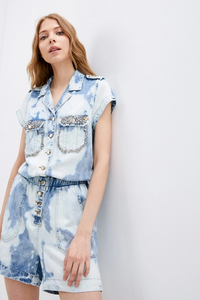

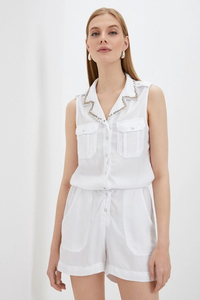

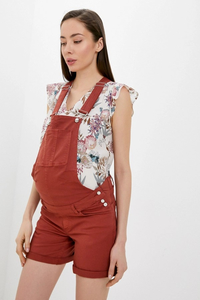

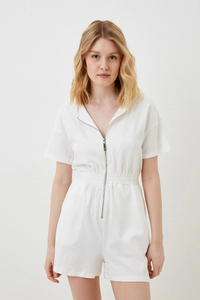

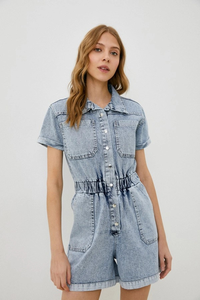

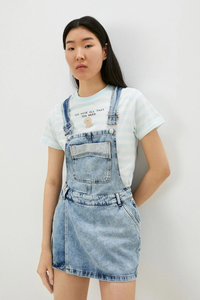

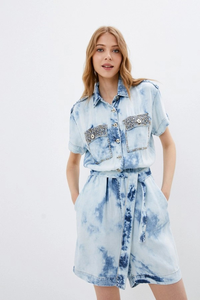

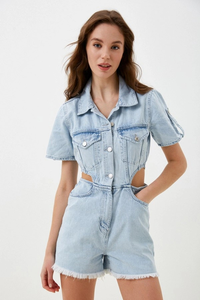

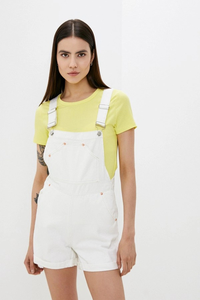

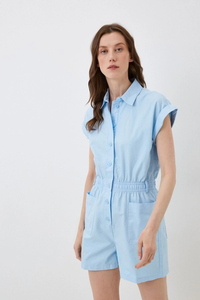

In [103]:
for f in sim_files:
    pil_img =  PIL.Image.open(f)
    display(pil_img.resize((200, 300), PIL.Image.Resampling.LANCZOS))

In [104]:
def get_sim_mean(viewed_ids, vects_norm, n=10):
    v = torch.zeros(2048)
    for i in viewed_ids:
        v += vects_norm[i]
    v = v / len(viewed_ids)
        
    v = v / v.norm()
    
    return get_similar(v, vects_norm, n)

In [105]:
viewed_ids = [0, 1, 100, 1000, 1600]
# viewed_ids = [1, 1079, 325]

In [106]:
sim_ind, sim_scores = get_sim_mean(viewed_ids, vects_norm)

In [107]:
sim_ind

array([ 354,  579,  327,  130,  769, 1000, 1585, 1451, 1029,  872])

In [108]:
sim_scores

array([0.90600145, 0.9046353 , 0.9005474 , 0.8990973 , 0.89678025,
       0.89590824, 0.8955504 , 0.89017284, 0.8891542 , 0.88892186],
      dtype=float32)

In [109]:
viewed_files = get_im_by_indexes(viewed_ids, index)
sim_files = get_im_by_indexes(sim_ind, index)
sim_files = [f for f in sim_files if f not in viewed_files]

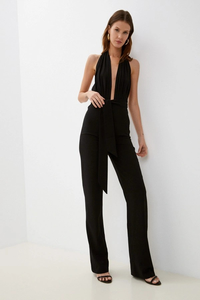

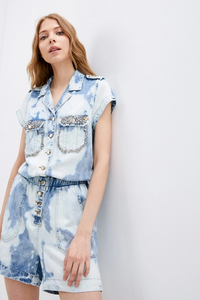

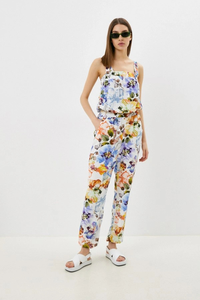

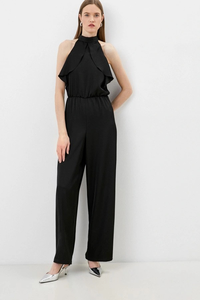

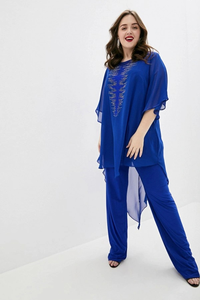

In [110]:
for f in viewed_files:
    pil_img =  PIL.Image.open(f)
    display(pil_img.resize((200, 300), PIL.Image.Resampling.LANCZOS))

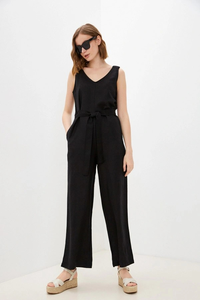

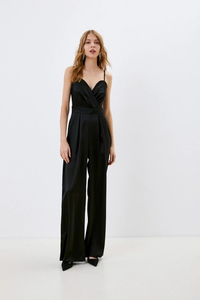

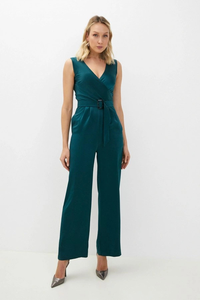

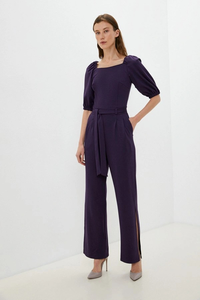

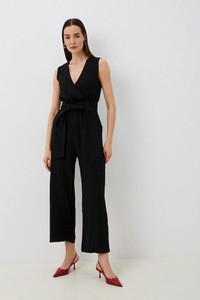

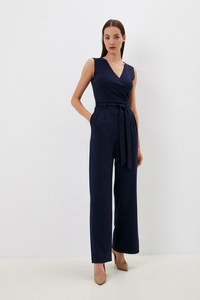

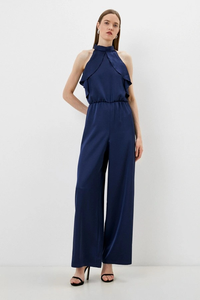

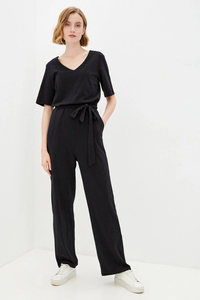

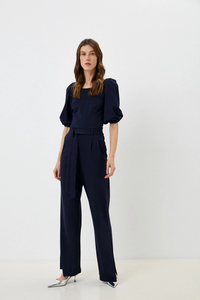

In [111]:
for f in sim_files:
    pil_img =  PIL.Image.open(f)
    display(pil_img.resize((200, 300), PIL.Image.Resampling.LANCZOS))